# 🧠 Machine Learning with Python: Student Performance Predictor for EduQuest Coaching

"""
EduQuest Coaching aims to enhance student outcomes by leveraging machine learning
to create a Student Performance Predictor. This system is designed to predict
student academic performance based on a wide range of inputs, including past academic
records, attendance, engagement in coursework, and demographic data.

By analyzing these factors, the model can identify students who may be at risk
of underperforming. This enables EduQuest Coaching to implement personalized
learning strategies and targeted interventions, ultimately boosting student
success rates and improving retention.

This project utilizes Python-based machine learning tools to build, train,
and evaluate predictive models, with a strong focus on real-world educational impact.
"""

In [ ]:
# 📘 Student Performance Predictor for EduQuest Coaching
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
df = pd.read_csv("/content/Student Performance Predictor for EduQuest Coaching.csv")


In [ ]:
df.head()

,gender,age,parental_education,family_income,internet_access,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,extra_curricular_involvement,learning_hours_per_week,tutor_support,final_exam_score
0,Male,14,Diploma,29591.84,Yes,93.25,91.01,76.56,9.52,1,Moderate,12.08,No,100.00
1,Male,16,Diploma,35222.46,Yes,85.06,83.85,64.82,3.42,2,Moderate,11.81,Yes,80.81
2,Male,14,Diploma,29730.93,Yes,79.93,86.71,75.02,3.75,1,Low,11.08,Yes,77.96
3,Female,15,Diploma,29074.09,Yes,98.94,88.04,55.50,6.95,0,Moderate,6.65,Yes,98.86
4,Male,19,Graduate,42305.33,Yes,64.54,61.22,98.85,6.03,5,Moderate,9.26,No,64.64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        1000 non-null   object 
 1   age                           1000 non-null   int64  
 2   parental_education            1000 non-null   object 
 3   family_income                 1000 non-null   float64
 4   internet_access               1000 non-null   object 
 5   previous_exam_score           1000 non-null   float64
 6   attendance_rate               1000 non-null   float64
 7   homework_completion_rate      1000 non-null   float64
 8   class_participation_score     1000 non-null   float64
 9   number_of_absences            1000 non-null   int64  
 10  extra_curricular_involvement  628 non-null    object 
 11  learning_hours_per_week       1000 non-null   float64
 12  tutor_support                 1000 non-null   object 
 13  fina

In [ ]:
df = df.dropna()

# Encoding categorical columns
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['parental_education'] = df['parental_education'].replace({'Diploma': 0, 'High School': 1, 'Graduate': 2, 'Postgraduate': 3})
df['family_income'] = df['family_income'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['internet_access'] = df['internet_access'].replace({'Yes': 1, 'No': 0})
df['tutor_support'] = df['tutor_support'].replace({'Yes': 1, 'No': 0})
df['extra_curricular_involvement'] = df['extra_curricular_involvement'].replace({'Low': 0, 'Moderate': 1, 'High': 2})

/tmp/ipython-input-6-1194146463.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
/tmp/ipython-input-6-1194146463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
/tmp/ipython-input-6-1194146463.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

In [ ]:
#define Y and X
df.columns

Index(['gender', 'age', 'parental_education', 'family_income',
       'internet_access', 'previous_exam_score', 'attendance_rate',
       'homework_completion_rate', 'class_participation_score',
       'number_of_absences', 'extra_curricular_involvement',
       'learning_hours_per_week', 'tutor_support', 'final_exam_score'],
      dtype='object')

In [ ]:
Y = df['final_exam_score']
X = df[['gender', 'age', 'parental_education', 'family_income',
        'internet_access', 'previous_exam_score', 'attendance_rate',
        'homework_completion_rate', 'class_participation_score',
        'number_of_absences', 'extra_curricular_involvement',
        'learning_hours_per_week', 'tutor_support']]

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2529)

In [ ]:
# Select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Train model
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predict
Y_pred = model.predict(X_test)

In [ ]:
# Evaluate
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Y_test,Y_pred)

0.05753622286301628

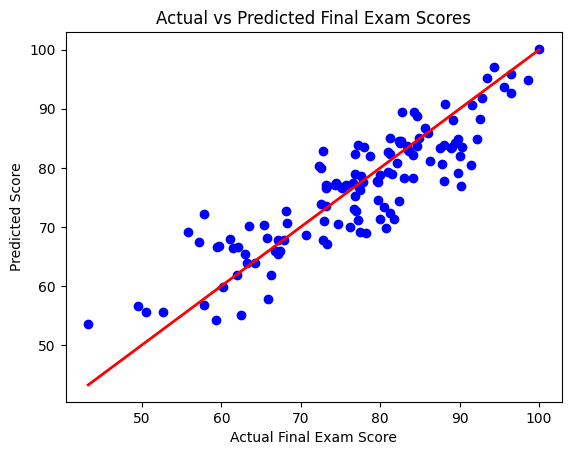

In [ ]:
# Visualize Actual vs Predicted
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Final Exam Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Final Exam Scores')
plt.show()